<a href="https://colab.research.google.com/github/skarde15/college_campus_network/blob/main/Customer_transaction_Assignment_Satyam_Karde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#Importing important libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
#Checking if the file path exist
!ls "/content/drive/MyDrive/Copy of customer_transactions_sample.csv"


'/content/drive/MyDrive/Copy of customer_transactions_sample.csv'


In [67]:
#Loading the dataset onto the google colab
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Copy of customer_transactions_sample.csv")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


# **DATA CLEANING**

In [68]:
#To check the dimension of the dataset
df.shape

(541910, 8)

In [69]:
# To check NA values in the dataset
df.isna().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [70]:
df.dtypes


Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [71]:
# To check duplicated values in the dataset
df.duplicated().sum()

5268

In [72]:
# To fill null values from Description and customer id columns
columns_to_fill = ['Description','Customer ID']

df[columns_to_fill]=df[columns_to_fill].fillna("unknown")

In [73]:
# To recheck the total null values
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

# **HANDLING OUTLIERS**

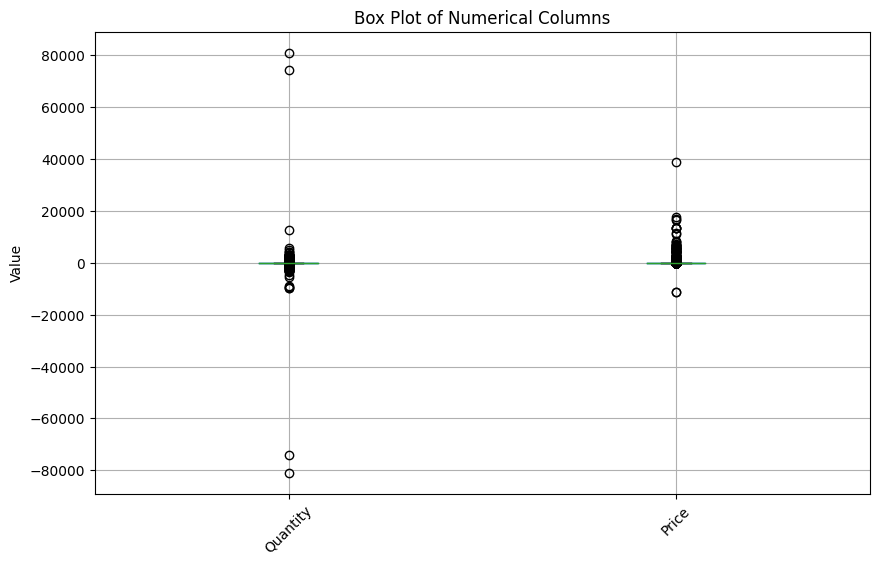

In [74]:
columns_to_plot=['Quantity','Price']

plt.figure(figsize=(10,6))
df.boxplot(column=columns_to_plot)
plt.title('Box Plot of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


In [75]:
# To check if the column 'Quantity' contains negative value

def check_negative_value():
  if (df['Quantity']< 0).any():
    print("The column contains negative value : yes ")
  else:
    print("The column contains negative value : no ")


def sumof_negative_value():
   sum_negative= (df['Quantity'] < 0).sum()
   if sum_negative > 0:
      print(f"The column contains {sum_negative} negative value ")
   else:
     print("The column contains no negative value :  ")
check_negative_value()
sumof_negative_value()






The column contains negative value : yes 
The column contains 10624 negative value 


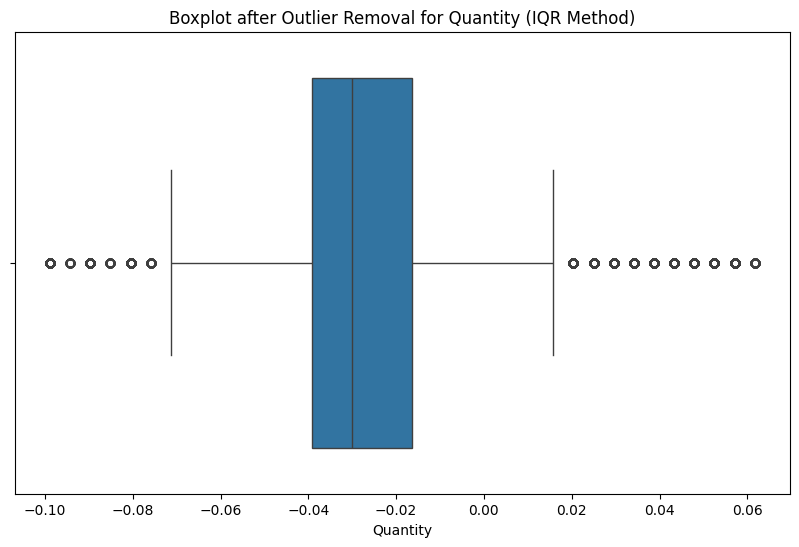

In [90]:
# Calculate the IQR for Quantity
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_filtered = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

# Create a boxplot to visualize the filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Quantity'])
plt.title('Boxplot after Outlier Removal for Quantity (IQR Method)')
plt.xlabel('Quantity')
plt.show()

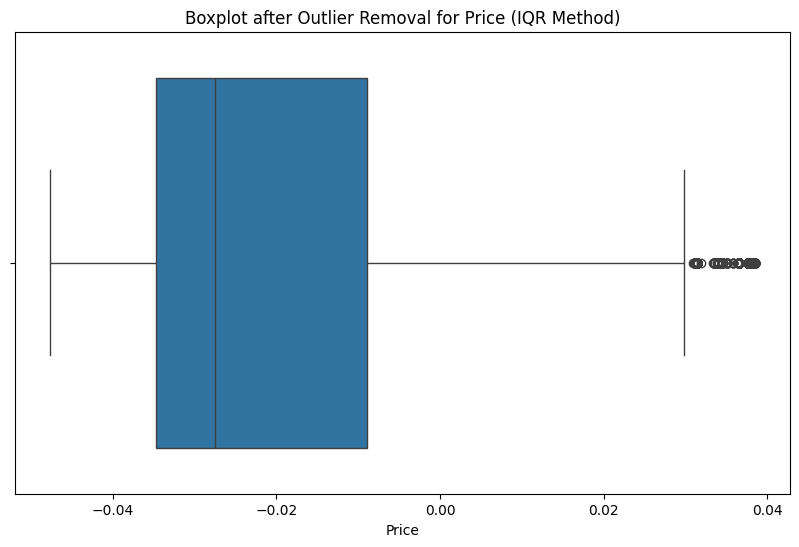

In [91]:
# Calculate the IQR for Price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_filtered = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Create a boxplot to visualize the filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Price'])
plt.title('Boxplot after Outlier Removal for Price (IQR Method)')
plt.xlabel('Price')
plt.show()

# **CORRELATION HEATMAP**

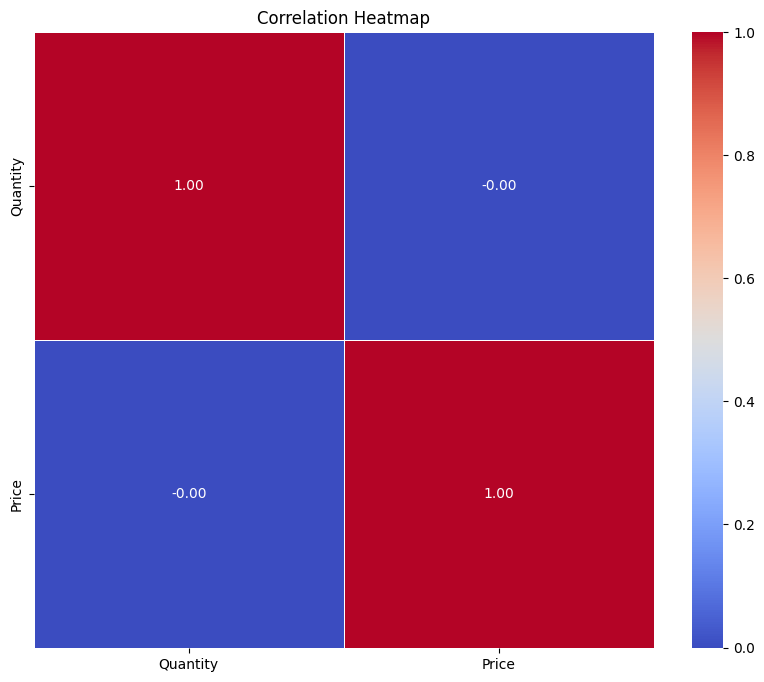

In [78]:

# Drop non-numeric columns or specific columns that you don't want in the correlation matrix
numeric_df = df.drop(['Invoice','StockCode','Description','InvoiceDate','Country','Customer ID'], axis=1)  # Adjust column names as needed

# Plot the correlation heatmap for the numeric DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# **Encoding**

In [79]:
from sklearn.preprocessing import OneHotEncoder

# Encoding Country using the one-hot encoding
countries = df['Country'].values.reshape(-1, 1)  # Reshape to 2D array for OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Use sparse=False for dense array output

# Fit and transform the 'Country' column
countries_encoded = encoder.fit_transform(countries)

# Get the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(['Country'])

# Convert the encoded array into a DataFrame with feature names
df_encoded = pd.DataFrame(countries_encoded, columns=feature_names)

# Concatenate the encoded DataFrame with the original DataFrame
df_final = pd.concat([df, df_encoded], axis=1)

# Print the final DataFrame with one-hot encoded columns
print(df_final.head())



  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  Price Customer ID         Country  Country_Australia  \
0  01-12-2010 08:26   2.55     17850.0  United Kingdom                0.0   
1  01-12-2010 08:26   3.39     17850.0  United Kingdom                0.0   
2  01-12-2010 08:26   2.75     17850.0  United Kingdom                0.0   
3  01-12-2010 08:26   3.39     17850.0  United Kingdom                0.0   
4  01-12-2010 08:26   3.39     17850.0  United Kingdom                0.0   

   Country_Austria  ...  Country_RSA  Country_Saudi Arabia  Country_Singapore  \
0              0.0  ...          0.

# **STANDARDIZATION**

In [80]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# standardize Quantity and Price
columns_to_standardize = ['Quantity', 'Price']

# Fit and transform the selected columns using StandardScaler
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])




# **K-MEANS CLUSTERING FOR MARKETING**

In [81]:
transactions= df[['Customer ID','InvoiceDate','Quantity','Price']]
# Calculate Recency
transactions['InvoiceDate'] = pd.to_datetime(transactions['InvoiceDate'],format='%d-%m-%Y %H:%M', dayfirst=True)  # Convert to datetime format
current_date = pd.to_datetime('today')  # Current date
recency = transactions.groupby('Customer ID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (current_date - recency['InvoiceDate']).dt.days  # Calculate recency in days

# Calculate Frequency
frequency = transactions.groupby('Customer ID').size().reset_index(name='Frequency')

# Calculate Monetary
transactions['TotalPrice'] = transactions['Quantity'] * transactions['Price']
monetary = transactions.groupby('Customer ID')['TotalPrice'].sum().reset_index(name='Monetary')

# Merge RFM metrics into one DataFrame
rfm = pd.merge(recency[['Customer ID', 'Recency']], frequency, on='Customer ID')
rfm = pd.merge(rfm, monetary, on='Customer ID')

# Print the RFM DataFrame
print(rfm.head())

  Customer ID  Recency  Frequency  Monetary
0     12346.0     4867          2  0.003233
1     12347.0     4543        182 -0.170809
2     12348.0     4616         31 -0.442580
3     12349.0     4560         73 -0.176136
4     12350.0     4851         17 -0.021276


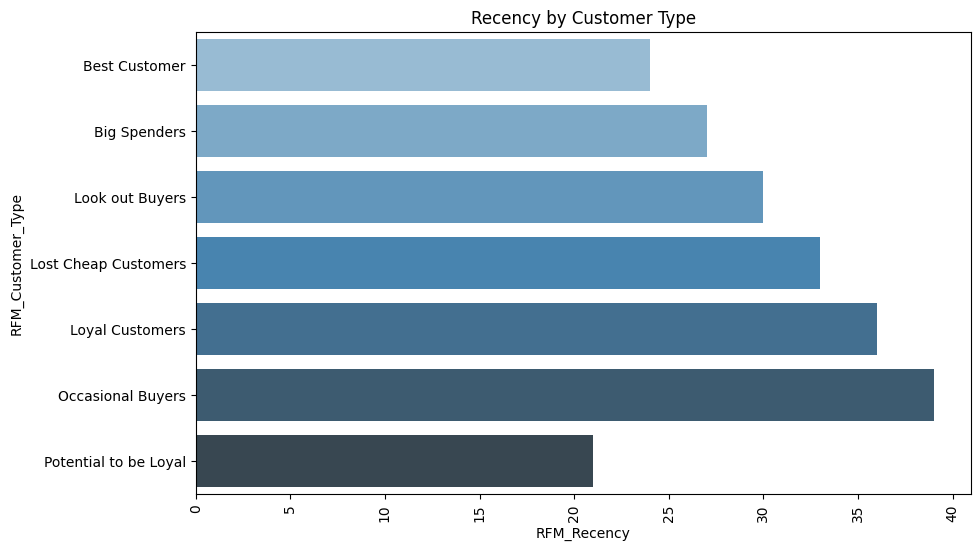

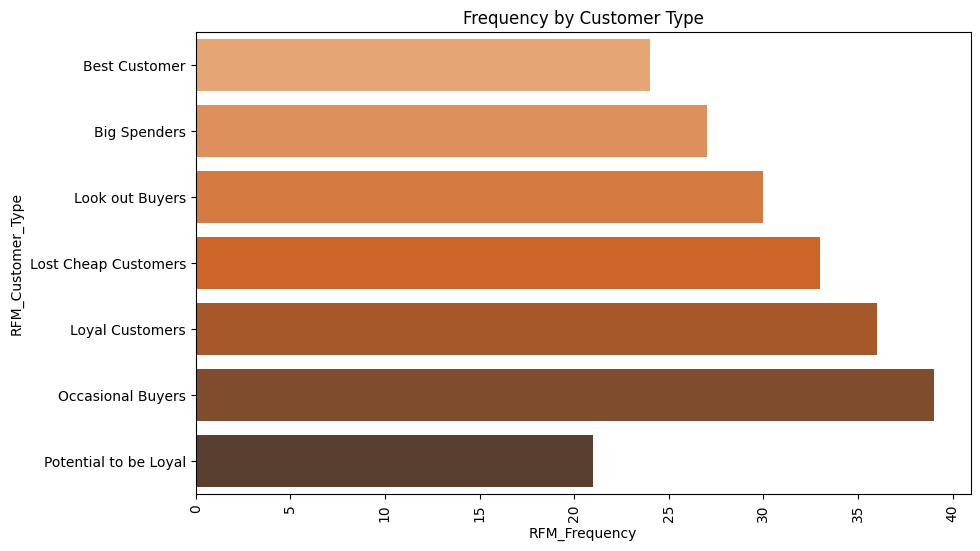

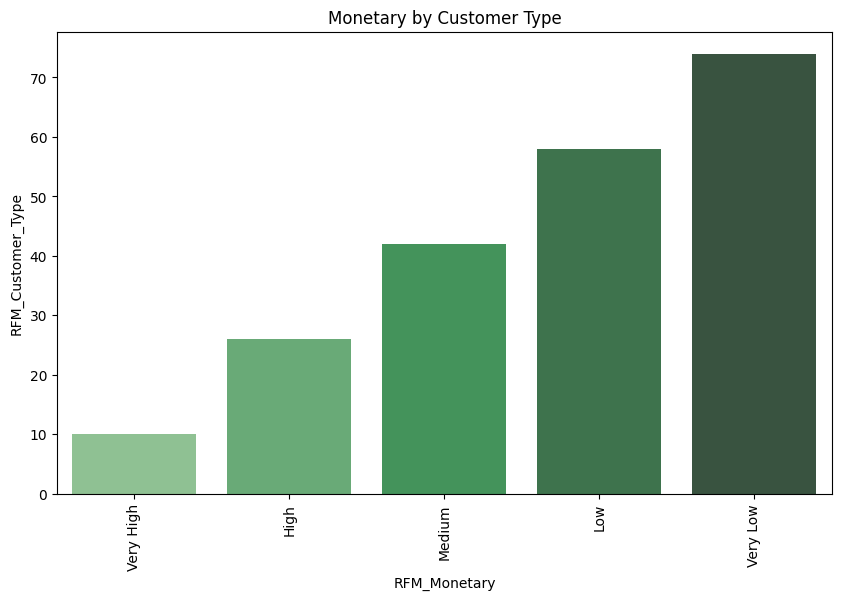

In [82]:

# Sample RFM DataFrame with RFM_Customer_Type
# Replace this with your actual DataFrame
rfm = pd.DataFrame({
    'Customer ID': range(1, 21),  # Example range, replace with your actual Customer IDs
    'RFM_Customer_Type': [
        'Best Customer', 'Big Spenders', 'Look out Buyers', 'Lost Cheap Customers',
        'Loyal Customers', 'Occasional Buyers', 'Potential to be Loyal',
        'Best Customer', 'Big Spenders', 'Look out Buyers', 'Lost Cheap Customers',
        'Loyal Customers', 'Occasional Buyers', 'Potential to be Loyal',
        'Best Customer', 'Big Spenders', 'Look out Buyers', 'Lost Cheap Customers',
        'Loyal Customers', 'Occasional Buyers'
    ],

    'Recency': range(1, 21),
    'Frequency': range(1,21),
    'Monetary': range(1,21),

})

# Ensure there are no warnings
pd.options.mode.chained_assignment = None  # default='warn'

# Binning for Recency
rfm['Recency_Bins'] = pd.cut(rfm['Recency'], bins=5, labels=['Very High', 'High', 'Medium', 'Low', 'Very Low'])

# Binning for Frequency
rfm['Frequency_Bins'] = pd.cut(rfm['Frequency'], bins=5, labels=['Very High', 'High', 'Medium', 'Low', 'Very Low'])

# Binning for Monetary
rfm['Monetary_Bins'] = pd.cut(rfm['Monetary'], bins=5, labels=['Very High', 'High', 'Medium', 'Low', 'Very Low'])

# Plot Recency by Customer Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Recency', y='RFM_Customer_Type', data=rfm, estimator=sum, ci=None, palette='Blues_d')
plt.title('Recency by Customer Type')
plt.xlabel('RFM_Recency')
plt.ylabel('RFM_Customer_Type')
plt.xticks(rotation=90)
plt.show()

# Plot Frequency by Customer Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='RFM_Customer_Type', data=rfm, estimator=sum, ci=None, palette='Oranges_d')
plt.title('Frequency by Customer Type')
plt.xlabel('RFM_Frequency')
plt.ylabel('RFM_Customer_Type')
plt.xticks(rotation=90)
plt.show()

# Plot Monetary by Customer Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Monetary_Bins', y='Customer ID', data=rfm, estimator=sum, ci=None, palette='Greens_d')
plt.title('Monetary by Customer Type')
plt.xlabel('RFM_Monetary')
plt.ylabel('RFM_Customer_Type')
plt.xticks(rotation=90)
plt.show()

In [83]:
print(rfm.columns)

Index(['Customer ID', 'RFM_Customer_Type', 'Recency', 'Frequency', 'Monetary',
       'Recency_Bins', 'Frequency_Bins', 'Monetary_Bins'],
      dtype='object')


# **FORECASTING FOR OPERATIONS**

In [88]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.88 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3079.635, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2931.308, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3004.976, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2893.754, Time=0.60 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.78 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2964.891, Time=0.51 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2855.909, Time=0.94 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2896.681, Time=0.44 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=5.21 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.46 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=2840.413, Time=1.08 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=2879.7

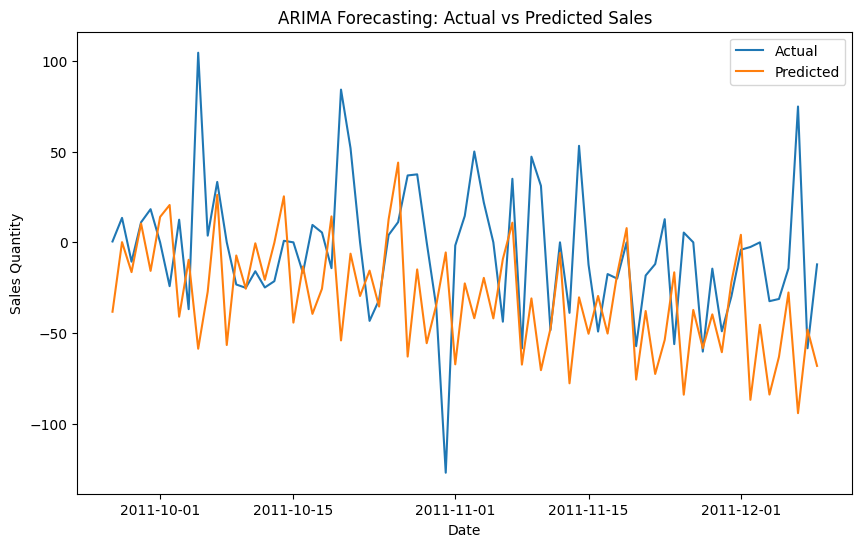

In [94]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from pmdarima import auto_arima

# Assuming sales_data is your DataFrame with 'InvoiceDate' as datetime and 'Quantity' as sales
# Convert 'InvoiceDate' to datetime if needed
sales_data= df[['InvoiceDate','Quantity']]
sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate'],format='%d-%m-%Y %H:%M', dayfirst=True)

# Aggregate daily sales
daily_sales = sales_data.groupby(pd.Grouper(key='InvoiceDate', freq='D')).sum()['Quantity'].reset_index()

# Split data into training and testing sets
train_size = int(len(daily_sales) * 0.8)
train_data, test_data = daily_sales[:train_size], daily_sales[train_size:]

# Use auto_arima to find the best ARIMA parameters
stepwise_model = auto_arima(train_data['Quantity'], start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# Fit ARIMA model
model_fit = stepwise_model.fit(train_data['Quantity'])

# Make predictions
predictions = model_fit.predict(n_periods=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Quantity'], predictions))
print(f'RMSE: {rmse}')

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(test_data['InvoiceDate'], test_data['Quantity'], label='Actual')
plt.plot(test_data['InvoiceDate'], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('ARIMA Forecasting: Actual vs Predicted Sales')
plt.legend()
plt.show()


# **CHURN RATE**

In [93]:

transactions = df[['Customer ID', 'InvoiceDate', 'Quantity', 'Price']]

# Convert 'InvoiceDate' to datetime format
transactions['InvoiceDate'] = pd.to_datetime(transactions['InvoiceDate'], format='%d-%m-%Y %H:%M')

# Calculate Recency
current_date = pd.to_datetime('today')  # Current date
recency = transactions.groupby('Customer ID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (current_date - recency['InvoiceDate']).dt.days  # Calculate recency in days

# Calculate Frequency
frequency = transactions.groupby('Customer ID').size().reset_index(name='Frequency')

# Calculate Monetary
transactions['TotalPrice'] = transactions['Quantity'] * transactions['Price']
monetary = transactions.groupby('Customer ID')['TotalPrice'].sum().reset_index(name='Monetary')

# Merge RFM metrics into one DataFrame
rfm = pd.merge(recency[['Customer ID', 'Recency']], frequency, on='Customer ID')
rfm = pd.merge(rfm, monetary, on='Customer ID')

# Print the RFM DataFrame
print(rfm.head())


  Customer ID  Recency  Frequency  Monetary
0     12346.0     4867          2  0.003233
1     12347.0     4543        182 -0.170809
2     12348.0     4617         31 -0.442580
3     12349.0     4560         73 -0.176136
4     12350.0     4851         17 -0.021276


Churn distribution:
 Churn
0    3153
1    1220
Name: count, dtype: int64
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       653

    accuracy                           1.00      1262
   macro avg       1.00      1.00      1.00      1262
weighted avg       1.00      1.00      1.00      1262



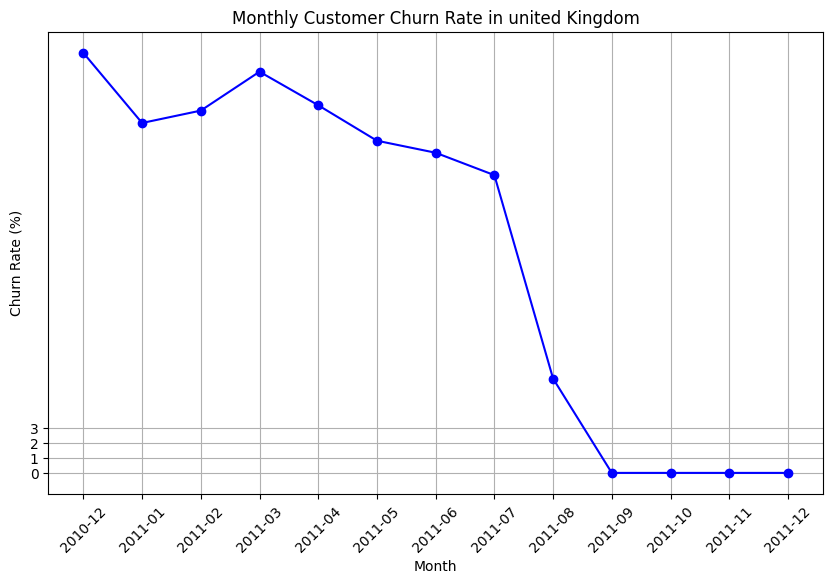

In [92]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and contains 'Customer ID', 'InvoiceDate', 'Quantity', 'Price', and 'Country'

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define a reference date for calculating recency
current_date = df['InvoiceDate'].max()

# Calculate Recency, Frequency, and Monetary (RFM)
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'Quantity': 'count',  # Frequency
    'Price': 'sum'  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'Quantity': 'Frequency', 'Price': 'Monetary'})

# Convert Recency, Frequency, and Monetary to numeric using pd.to_numeric
rfm['Recency'] = pd.to_numeric(rfm['Recency'], errors='coerce')
rfm['Frequency'] = pd.to_numeric(rfm['Frequency'], errors='coerce')
rfm['Monetary'] = pd.to_numeric(rfm['Monetary'], errors='coerce')

# Drop rows with NaN values if needed
rfm = rfm.dropna()

# Add Churn Label
# Assume customers who haven't purchased in the last 120 days are considered churned
churn_threshold = 120
rfm['Churn'] = (rfm['Recency'] > churn_threshold).astype(int)

# Check the distribution of Churn labels
print("Churn distribution:\n", rfm['Churn'].value_counts())

# Ensure there are both classes present
if rfm['Churn'].nunique() == 1:
    raise ValueError("The target 'y' needs to have more than 1 class.")

# Split data into features and target
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Churn']

# Handle class imbalance using SMOTE or class_weight in RandomForestClassifier
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Predict churn probabilities for all customers
rfm['Churn_Probability'] = model.predict_proba(X)[:, 1]

# Merge rfm with df to get country information
rfm = rfm.merge(df[['Customer ID', 'Country']].drop_duplicates(), on='Customer ID')

# Create a Month column from InvoiceDate in the original df and merge it with rfm
df['Month'] = df['InvoiceDate'].dt.to_period('M')
rfm = rfm.merge(df[['Customer ID', 'Month']].drop_duplicates(), on='Customer ID')

# Calculate Monthly Churn Rate by Country
churn_rate = rfm.groupby(['Month', 'Country'])['Churn'].mean().reset_index()


import matplotlib.pyplot as plt

# Assuming churn_rate DataFrame contains 'Month', 'Country', and 'Churn' columns as calculated in your provided code

# Filter data for a specific country if needed
country_data = churn_rate[churn_rate['Country']=='United Kingdom']

# Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(country_data['Month'].astype(str), country_data['Churn']*100, marker='o', linestyle='-', color='b')
plt.title('Monthly Customer Churn Rate in united Kingdom')
plt.xlabel('Month')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(range(0, 4))

# Show plot
plt.show()
